# The Contrast Transfer Function in `torch-fourier-filter`

In [1]:
import matplotlib.pyplot as plt
import torch

from torch_fourier_filter.ctf import calculate_ctf_1d, calculate_ctf_2d

### CTF parameters

We pre-define the following parameters that are accessed later for the CTF calculation.

In [2]:
defocus_u = 0.52  # microns
defocus_v = 0.48  # microns
defocus_angle = 20.0  # degrees
voltage = 300.0  # kV
spherical_aberration = 2.7  # mm
amplitude_contrast = 0.07
b_factor = 120.0
phase_shift = 0.0
pixel_size = 1.2  # Angstroms

## Calculating a 1D CTF

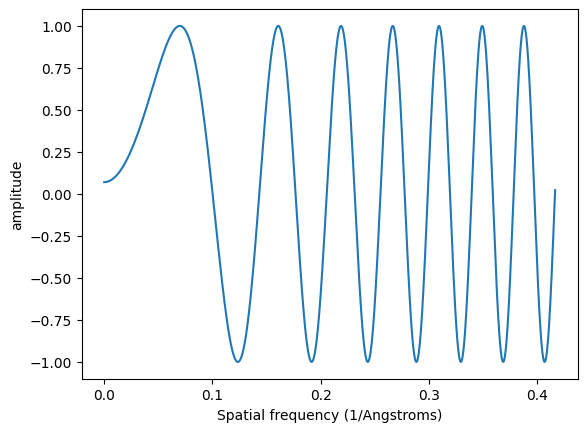

In [3]:
ctf1d = calculate_ctf_1d(
    defocus=(defocus_u + defocus_v) / 2,
    voltage=voltage,
    spherical_aberration=spherical_aberration,
    amplitude_contrast=amplitude_contrast,
    b_factor=b_factor,
    phase_shift=phase_shift,
    pixel_size=pixel_size,
    n_samples=1024,
    oversampling_factor=2,
)[0]

x = torch.linspace(0, 0.5, len(ctf1d))
x /= pixel_size

plt.plot(x, ctf1d)
plt.xlabel("Spatial frequency (1/Angstroms)")
plt.ylabel("amplitude")
plt.show()

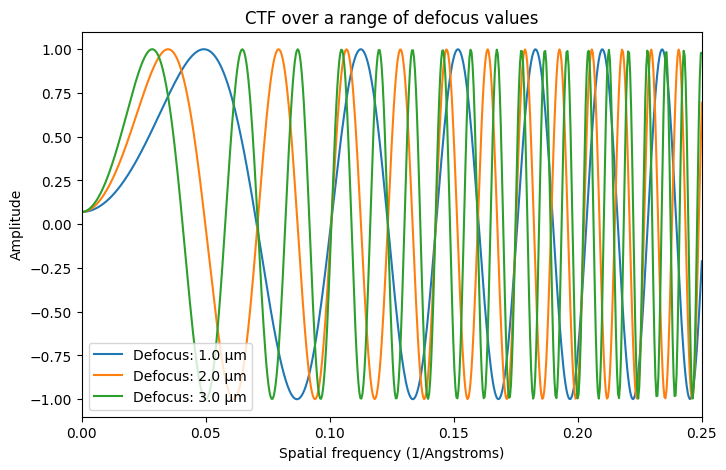

In [6]:
defocus_values = [1.0, 2.0, 3.0]

plt.figure(figsize=(8, 5))

for defocus in defocus_values:
    ctf1d = calculate_ctf_1d(
        defocus=defocus,
        voltage=voltage,
        spherical_aberration=spherical_aberration,
        amplitude_contrast=amplitude_contrast,
        b_factor=b_factor,
        phase_shift=phase_shift,
        pixel_size=pixel_size,
        n_samples=1024,
        oversampling_factor=2,
    )[0]

    x = torch.linspace(0, 0.5, len(ctf1d))
    x /= pixel_size

    plt.plot(x, ctf1d, label=f"Defocus: {defocus} µm")

plt.xlabel("Spatial frequency (1/Angstroms)")
plt.ylabel("Amplitude")
plt.xlim(0, 0.25)
plt.legend()
plt.title("CTF over a range of defocus values")
plt.show()

## Calculating a 2D CTF

Like the other TeamTomo packages, the 2D CTF calculation automatically takes the `rfft` and `fftshift` parameters into account. Note that here the mean defocus and astigmatism are used rather than the defoci along the major and minor axes.

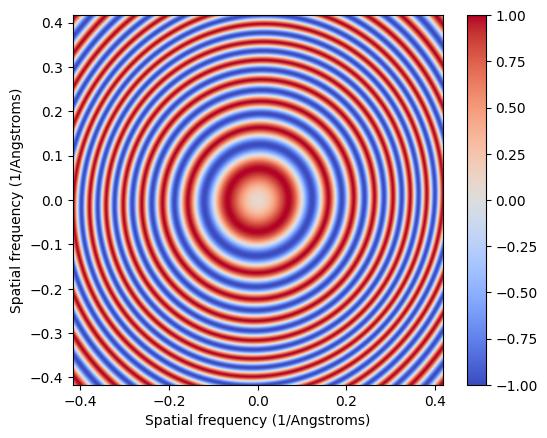

In [5]:
ctf2d = calculate_ctf_2d(
    defocus=(defocus_u + defocus_v) / 2,
    astigmatism=(defocus_u - defocus_v) / 2,
    astigmatism_angle=defocus_angle,
    voltage=voltage,
    spherical_aberration=spherical_aberration,
    amplitude_contrast=amplitude_contrast,
    b_factor=b_factor,
    phase_shift=phase_shift,
    pixel_size=pixel_size,
    image_shape=(1024, 1024),
    rfft=False,
    fftshift=True,
)[0]

extent = [-0.5 / pixel_size, 0.5 / pixel_size, -0.5 / pixel_size, 0.5 / pixel_size]
plt.imshow(ctf2d, cmap="coolwarm", extent=extent)
plt.xlabel("Spatial frequency (1/Angstroms)")
plt.ylabel("Spatial frequency (1/Angstroms)")
plt.colorbar()
plt.show()